In [1]:
import random, csv, time, os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import optimize

%matplotlib inline
# Videos result files are from http://sunai.uoc.edu/traits/layout2/results/

In [60]:
def append_pair(comp, name1, name2, name_to_num):
    if comp == '-1':
        return((name_to_num[name2], name_to_num[name1]))
    if comp == '1':
        return((name_to_num[name1], name_to_num[name2]))
    
def calc_error(prediction, truth):
    return np.linalg.norm(prediction - truth)

def mle(w):    
    """
    Calculate the MLE of w.
    Due to the fact that optimize.minimize only takes 1 input, 
    here the pair information is imported as comp from global variable
    """    
    
    out = -1
#     comp = test_pairs_with_error
#     comp = pairs[0]
    comp = pairs_truth
                
    for pair in comp:

        out *= 1/(1+np.exp(-w[pair[0]] + w[pair[1]]))   
    return out

In [84]:
video_num = 8

video_score = np.random.uniform(-5,5,video_num)
resolution = 0.1
video_score = np.round(video_score/resolution)*resolution
# video_score = [3,5,4,2,0,-1]

global pairs_truth
global test_pairs_with_error
pairs_truth = []

for i in range(len(video_score)-1):
    for j in range(i+1, len(video_score)):
        if video_score[i] > video_score[j]:
            pairs_truth.append((i,j))
        else:
            pairs_truth.append((j,i))
            
total_pairs = len(pairs_truth)  

In [85]:
print pairs_truth
print video_score

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (3, 2), (4, 2), (2, 5), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7), (5, 6), (5, 7), (7, 6)]
[ 4.9 -3.5  1.6  4.4  3.8  0.2 -3.4 -1.5]


In [94]:
w = np.random.uniform(-5,5,video_num)
# w = np.zeros(video_num)
print w

bnds = ()
cons = ()

for i in range(video_num):
    bnds += ((-5.0,5.0),)

cons += ({'type': 'eq',
          'fun' : lambda w: np.abs(np.sum(w))},)

res = optimize.minimize(mle, w,bounds=bnds,constraints=cons)
# res = optimize.minimize_scalar(mle, bounds=bnds,constraints=cons)

print res.x
print video_score

[ 3.76959717 -3.89055705  3.07371768 -3.08302323  1.08568195  1.18868715
  0.62162366  2.86709846  2.73786647 -3.25639282]
[ 3.25816722 -4.40198699  2.56228773 -3.59445317  0.574252    0.6772572
  0.11019372  2.35566852  2.22643653 -3.76782276]
[-1.1  1.7 -0.9  4.4  3.6 -3.2 -4.3 -3.9  2.2 -3.8]


In [ ]:
def brute(num_videos, pairs):
    
    

# Performance Test
We have video_num videos, and the score for each video, stored in video_score, is randomly assigned between [-5,5] from a uniform distribution, and then created total_pairs to store all the pairs. Note here total_pairs doesn't include duplicated videos, meaning if i>j is in it, then j<i will not be in it. 

In [87]:
video_num = 10

video_score = np.random.uniform(-5,5,video_num)
resolution = 0.1
video_score = np.round(video_score/resolution)*resolution

global pairs_truth
global test_pairs_with_error
pairs_truth = []

for i in range(len(video_score)-2):
    for j in range(i+1, len(video_score)):
        if video_score[i] > video_score[j]:
            pairs_truth.append((i,j))
        else:
            pairs_truth.append((j,i))
            
total_pairs = len(pairs_truth)  

In [6]:
total_pairs

44

In [7]:
num_to_be_flipped_vec = 3
pct_to_be_flipped = 0.2
# num_test_pairs_vec = [1*video_num, 2*video_num, 3*video_num, 4*video_num, 5*video_num, 7*video_num,
#                       10*video_num, 15*video_num, 25*video_num, 35*video_num, 50*video_num]
num_test_pairs_vec = [1*video_num, 2*video_num, 3*video_num, 4*video_num]
t = time.time()
result = dict()

for ind in range(len(num_test_pairs_vec)):
    num_test_pair = num_test_pairs_vec[ind]
    num_to_flip = int(num_test_pair * pct_to_be_flipped)
    
    test_pairs = [pairs_truth[i] for i in random.sample(range(total_pairs), num_test_pair)]
    test_pairs_with_error = test_pairs
    
    for i in random.sample(range(num_test_pair), num_to_flip):
        test_pairs[i] = (test_pairs[i][1],test_pairs[i][0])
        
#     w = np.random.uniform(-5,5,video_num)
    w = np.zeros(video_num)

    bnds = ()
    cons = ()

    for i in range(video_num):
        bnds += ((-5.0,5.0),)

    cons += ({'type': 'ineq',
              'fun' : lambda w: np.abs(np.sum(w))},)

    res = optimize.minimize(mle, w, bounds=bnds, options={'disp': True})
    print time.time()-t
    result[str(num_test_pairs_vec[ind])] = res['x']

0.015976190567
0.0234072208405
0.0298280715942
0.03449010849


Now calculating results with all pairs

In [8]:
result

{'10': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 '20': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 '30': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 '40': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])}

In [9]:
video_score

array([ 4.2,  1. , -1.3,  2.4, -0.8, -4.6, -0.5,  0.6,  3.5, -4.1])

In [10]:
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

# Below is with Generic Likelihood Model Class

In [67]:
from __future__ import division

from matplotlib import  pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

In [30]:
class Pairwise(GenericLikelihoodModel):
    def __init__(self, endog, exog=None, **kwds):
        super(Pairwise, self).__init__(endog, exog, **kwds)
    
    def nloglikeobs(self, params):
        '''
        Here params is a list: [pairs, w]
        '''
        out = -1
        pairs = self.endog
        w = params
        
        for pair in pairs:
            out *= 1/(1+np.exp(-w[pair[0]] + w[pair[1]]))   
            
        return out
    
    def fit(self, start_params=None, maxiter=1000, maxfun=5000):  
        return super(Pairwise, self).fit(start_params=start_params, maxiter=maxiter, maxfun=maxfun)

In [78]:
video_num = 50

video_score = np.random.uniform(-5,5,video_num)
resolution = 0.1
video_score = np.round(video_score/resolution)*resolution

pairs_truth = []

for i in range(len(video_score)-1):
    for j in range(i+1, len(video_score)):
        if video_score[i] > video_score[j]:
            pairs_truth.append((i,j))
        else:
            pairs_truth.append((j,i))
            
total_pairs = len(pairs_truth)  

In [85]:
model = Pairwise(pairs_truth)
# w_init = np.ones(video_num)
w_init = np.random.uniform(-5,5,video_num)
results = model.fit(w_init, maxiter=100000, maxfun=50000)

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 13
         Function evaluations: 675


In [86]:
true_order = np.array(video_score).argsort()
true_ranks = true_order.argsort()

temp_o = np.array(results.params).argsort()
temp_r = temp_o.argsort()

resolution = 0.1
video_score_results = np.round(results.params/resolution)*resolution

print 'Result Order \t True Order \t Result Score \t Ture Score'
for i in range(len(temp_r)):
    print temp_r[i], '\t\t', true_ranks[i], '\t\t', video_score_results[i], '\t\t', video_score[i]

Result Order 	 True Order 	 Result Score 	 Ture Score
20 		38 		-0.0 		3.8
16 		23 		-1.0 		0.7
32 		25 		1.9 		1.1
2 		3 		-4.7 		-3.5
4 		4 		-4.7 		-3.5
47 		17 		4.8 		-0.2
30 		34 		1.8 		2.2
1 		10 		-4.8 		-2.0
41 		1 		4.1 		-4.4
49 		35 		5.0 		2.2
12 		21 		-2.3 		0.4
38 		42 		3.5 		4.1
39 		8 		4.0 		-2.5
14 		15 		-2.0 		-0.7
18 		46 		-0.9 		4.8
28 		41 		1.7 		4.1
3 		0 		-4.7 		-4.8
10 		13 		-3.2 		-1.0
34 		31 		2.5 		1.9
36 		12 		3.2 		-1.0
37 		5 		3.3 		-3.1
17 		2 		-1.0 		-3.9
19 		29 		-0.5 		1.9
40 		43 		4.1 		4.2
15 		7 		-1.7 		-2.5
31 		19 		1.9 		0.2
26 		16 		1.1 		-0.6
43 		20 		4.3 		0.4
25 		6 		0.9 		-2.6
42 		24 		4.2 		1.0
33 		9 		2.3 		-2.4
11 		18 		-3.1 		0.1
46 		48 		4.5 		4.8
6 		26 		-3.9 		1.3
21 		45 		-0.0 		4.4
27 		49 		1.2 		5.0
9 		44 		-3.6 		4.3
0 		37 		-4.9 		3.4
45 		47 		4.4 		4.8
22 		11 		0.2 		-1.1
13 		28 		-2.1 		1.7
7 		33 		-3.9 		2.1
35 		40 		3.0 		4.0
5 		22 		-4.5 		0.6
44 		36 		4.3 		2.9
29 		30 		1.8 		1.9
24 		39

In [87]:
print np.abs(temp_r - true_ranks)

[18  7  7  1  0 30  4  9 40 14  9  4 31  1 28 13  3  3  3 24 32 15 10  3  8
 12 10 23 19 18 24  7  2 20 24 22 35 37  2 11 15 26  5 17  8  1 15  9 21  6]


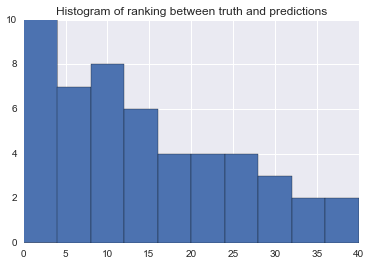

In [89]:
diff = np.abs(temp_r - true_ranks)
plt.hist(diff)
plt.title('Histogram of ranking between truth and predictions')